In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 

In [2]:
# fix random seed for reproducibility
np.random.seed(7)

In [3]:
#Same Train And test data
#trainging on Healthy data
"""
data = pd.read_csv('HealtyNormalized.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = data


#testdata = pd.read_csv('combinedFault.csv')
data.info() , testdata.info(), data.head() , testdata.head()"""


'\ndata = pd.read_csv(\'HealtyNormalized.csv\')\ndata = data.rename(columns={"vsH": "speed", "vbH": "vibration"})\ntestdata = data\n\n\n#testdata = pd.read_csv(\'combinedFault.csv\')\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [4]:
##Same Train And test data 
#trainging on faulty data

"""data = pd.read_csv('combinedFault.csv')
data = data.rename(columns={"vsC": "speed", "vbC": "vibration"})
testdata = data

data.info() , testdata.info(), data.head() , testdata.head()"""

'data = pd.read_csv(\'combinedFault.csv\')\ndata = data.rename(columns={"vsC": "speed", "vbC": "vibration"})\ntestdata = data\n\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [5]:
#Different test data
"""
data = pd.read_csv('HealtyNormalized.csv')
testdata = pd.read_csv('combinedFault.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = testdata.rename(columns={"vsC": "speed", "vbC": "vibration"})

data.info() , testdata.info(), data.head() , testdata.head()"""

'\ndata = pd.read_csv(\'HealtyNormalized.csv\')\ntestdata = pd.read_csv(\'combinedFault.csv\')\ndata = data.rename(columns={"vsH": "speed", "vbH": "vibration"})\ntestdata = testdata.rename(columns={"vsC": "speed", "vbC": "vibration"})\n\ndata.info() , testdata.info(), data.head() , testdata.head()'

In [6]:
"""
two diffrent bearing datasets

trainging on current data and test on another dataset which contains to faults DE = Drive End vibration with 7 inch fault

and 

FE = fan end vibration data

FE selected for test data as vibration 
"""

"""data = pd.read_csv('HealtyNormalized.csv')
testdata = pd.read_csv('IR - 7.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = testdata.rename(columns={"DE": "DE", "FE": "vibration"})

data.info() , testdata.info(), data.head() , testdata.head()"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   speed      float64
 1   vibration  float64
dtypes: float64(2)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DE         121155 non-null  float64
 1   vibration  121155 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


(None,
 None,
       speed  vibration
 0  0.000998  -0.000217
 1  0.001001  -0.000185
 2  0.001002  -0.000152
 3  0.001007  -0.000185
 4  0.001010  -0.000217,
          DE  vibration
 0 -0.093238  -0.029175
 1  0.187288  -0.186347
 2  0.217663  -0.341260
 3  0.070172  -0.160871
 4  0.100385   0.179978)

In [4]:
"""
two diffrent bearing datasets

trainging on current data and test on another dataset which contains to faults DE = Drive End vibration with 7 inch fault

and 

FE = fan end vibration data

FE selected for test data as vibration 
"""

data = pd.read_csv('HealtyNormalized.csv')
testdata = pd.read_csv('combinedFault.csv')
data = data.rename(columns={"vsH": "speed", "vbH": "vibration"})
testdata = testdata.rename(columns={"vsC": "speed", "vbC": "vibration"})




data.info() , testdata.info(), data.head() , testdata.head() , data.shape , testdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   speed      float64
 1   vibration  float64
dtypes: float64(2)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889257 entries, 0 to 1889256
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   speed      float64
 1   vibration  float64
dtypes: float64(2)
memory usage: 28.8 MB


(None,
 None,
       speed  vibration
 0  0.000998  -0.000217
 1  0.001001  -0.000185
 2  0.001002  -0.000152
 3  0.001007  -0.000185
 4  0.001010  -0.000217,
       speed  vibration
 0  0.039634   0.018847
 1  0.039634   0.018847
 2  0.039634   0.018518
 3  3.632150   0.015887
 4  4.148328   0.018518,
 (1999943, 2),
 (1889257, 2))

In [6]:
vibration = data['vibration']
vibration = pd.DataFrame(vibration)

#testvibration = testdata['vbC']
testvibration = testdata['vibration']
testvibration = pd.DataFrame(testvibration)


vibration.info() , testvibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   vibration  float64
dtypes: float64(1)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889257 entries, 0 to 1889256
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   vibration  float64
dtypes: float64(1)
memory usage: 14.4 MB


(None, None)

In [13]:
healthydataset = vibration.iloc[0:20000]
faultyvibration = testvibration.iloc[0:20000]

combinedataset = healthydataset.append(faultyvibration)
combinedataset.info()

vibration = combinedataset
testvibration = combinedataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  40000 non-null  float64
dtypes: float64(1)
memory usage: 625.0 KB


In [7]:
"""vibration = data['vibration']
vibration = pd.DataFrame(vibration)

#testvibration = testdata['vbC']
testvibration = testdata['vibration']
testvibration = pd.DataFrame(testvibration)


vibration.info() , testvibration.info()"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   vibration  float64
dtypes: float64(1)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   vibration  121155 non-null  float64
dtypes: float64(1)
memory usage: 946.6 KB


(None, None)

In [17]:
vibration.head(), testvibration.head(), vibration.shape ,  testvibration.shape

(   vibration
 0  -0.000217
 1  -0.000185
 2  -0.000152
 3  -0.000185
 4  -0.000217,
    vibration
 0  -0.000217
 1  -0.000185
 2  -0.000152
 3  -0.000185
 4  -0.000217,
 (40000, 1),
 (40000, 1))

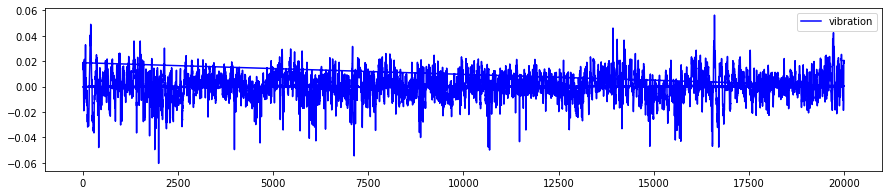

In [18]:
dataset = vibration.plot(color='b',figsize = (15,3))

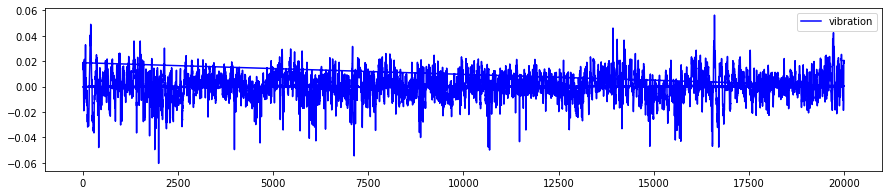

In [19]:
testdataset = testvibration.plot(color='b',figsize = (15,3))

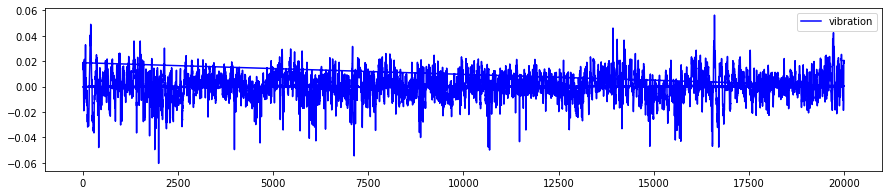

In [21]:
dataset = vibration.iloc[0:40000].plot(color='b',figsize = (15,3))

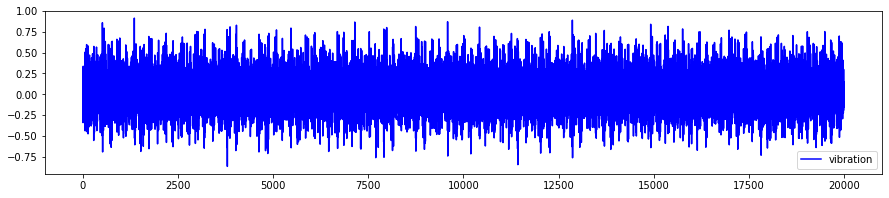

In [12]:
testdataset = testvibration.iloc[0:20000].plot(color='b',figsize = (15,3))

<AxesSubplot:>

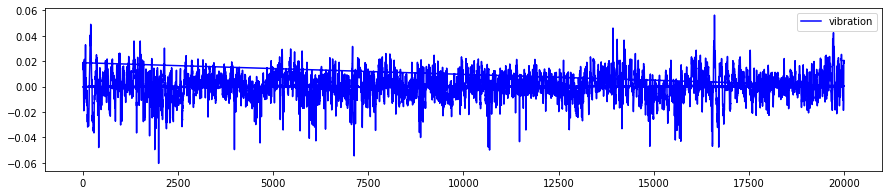

In [26]:
smallDataset = vibration.iloc[0:40000]
smallDataset.plot(color='b',figsize = (15,3))

<AxesSubplot:>

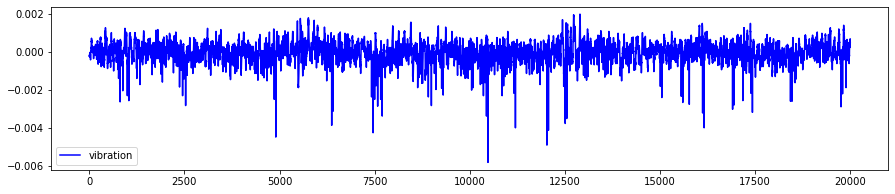

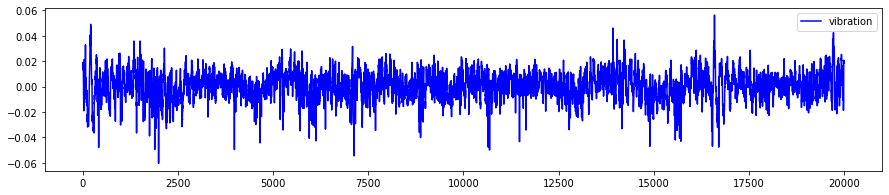

In [27]:
testsmallDataset = testvibration.iloc[0:20000]
testsmallDataset.plot(color='b',figsize = (15,3))
testsmallDataset1 = testvibration.iloc[20001:40000]
testsmallDataset1.plot(color='b',figsize = (15,3))

In [15]:
smallDataset.info(), testsmallDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


(None, None)

In [31]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(smallDataset)
normalizedVibration = pd.DataFrame(normalizedVibration)

In [29]:
# normalize the testdataset
scaler = MinMaxScaler(feature_range=(0, 1))
testnormalizedVibration = scaler.fit_transform(testsmallDataset)
testnormalizedVibration = pd.DataFrame(testnormalizedVibration)

scaler1 = MinMaxScaler(feature_range=(0, 1))
testnormalizedVibration1 = scaler.fit_transform(testsmallDataset1)
testnormalizedVibration1 = pd.DataFrame(testnormalizedVibration1)

<AxesSubplot:>

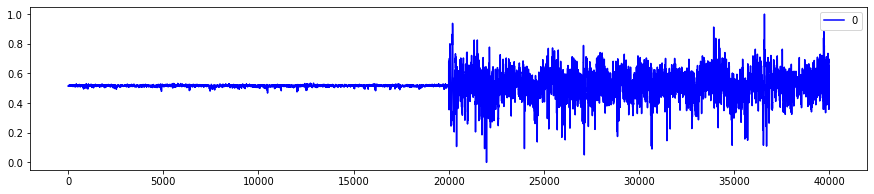

In [32]:
normalizedVibration.plot(color='b',figsize = (15,3))


<AxesSubplot:>

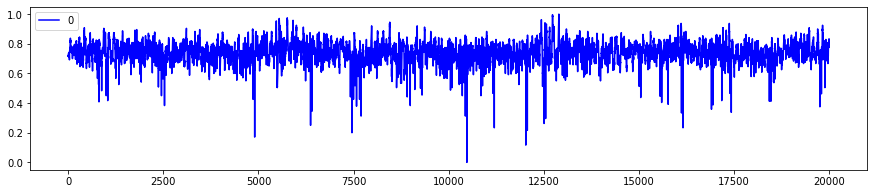

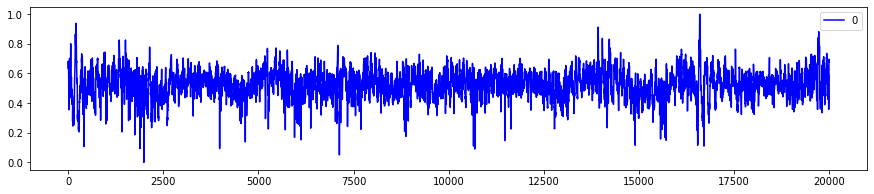

In [33]:
testnormalizedVibration.plot(color='b',figsize = (15,3))
testnormalizedVibration1.plot(color='b',figsize = (15,3))

In [34]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset.tail()

,0
39995,0.667606
39996,0.690141
39997,0.695775
39998,0.692958
39999,0.676056


In [63]:
testdataset = testnormalizedVibration
testdataset = pd.DataFrame(testdataset)
testdataset.tail()


testdataset1 = testnormalizedVibration1
testdataset1 = pd.DataFrame(testdataset1)
testdataset.tail() , testdataset1.tail() , testdataset.shape , testdataset1.shape

(              0
 19995  0.829167
 19996  0.833333
 19997  0.795833
 19998  0.808333
 19999  0.808333,
               0
 19994  0.667606
 19995  0.690141
 19996  0.695775
 19997  0.692958
 19998  0.676056,
 (20000, 1),
 (19999, 1))

In [22]:
"""
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

"""

'\n# split into train and test sets\ntrain_size = int(len(dataset) * 0.67)\ntest_size = len(dataset) - train_size\ntrain, test = dataset[0:train_size], dataset[train_size:len(dataset)]\n\nprint("Total Dataset   = ", len(dataset))\nprint("Training Smaple = ", train_size)\nprint("Testing Sample  = ", test_size)\n\n'

In [80]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
#train, test = dataset[0:train_size], testdataset[train_size:len(dataset)]

train = dataset

test = testdataset[0:13200]
test1 = testdataset1[0:13200]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)
                                                      

Total Dataset   =  40000
Training Smaple =  26800
Testing Sample  =  13200


In [81]:
train.shape , test.shape , test1.shape

((40000, 1), (13200, 1), (13200, 1))

In [82]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [83]:
test[0].iloc[1:6]

1    0.720833
2    0.725000
3    0.720833
4    0.716667
5    0.712500
Name: 0, dtype: float64

In [84]:
test[0].describe()

count    13200.000000
mean         0.751935
std          0.065652
min          0.000000
25%          0.712500
50%          0.750000
75%          0.791667
max          1.000000
Name: 0, dtype: float64

In [85]:
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)
testX1, testY1   = create_dataset(test1[0], look_back)

In [86]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))

In [87]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 1680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.layers


In [89]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=20
BATCH_SIZE=1

history = model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE, verbose=2, validation_split=0.1)

Epoch 1/20
35909/35909 - 24s - loss: 0.0218 - accuracy: 2.7848e-05 - val_loss: 0.0324 - val_accuracy: 2.5063e-04
Epoch 2/20
35909/35909 - 25s - loss: 0.0156 - accuracy: 2.7848e-05 - val_loss: 0.0209 - val_accuracy: 2.5063e-04
Epoch 3/20
35909/35909 - 25s - loss: 0.0142 - accuracy: 2.7848e-05 - val_loss: 0.0256 - val_accuracy: 2.5063e-04
Epoch 4/20
35909/35909 - 25s - loss: 0.0134 - accuracy: 2.7848e-05 - val_loss: 0.0214 - val_accuracy: 2.5063e-04
Epoch 5/20
35909/35909 - 24s - loss: 0.0129 - accuracy: 2.7848e-05 - val_loss: 0.0187 - val_accuracy: 2.5063e-04
Epoch 6/20
35909/35909 - 25s - loss: 0.0126 - accuracy: 2.7848e-05 - val_loss: 0.0182 - val_accuracy: 2.5063e-04
Epoch 7/20
35909/35909 - 27s - loss: 0.0122 - accuracy: 2.7848e-05 - val_loss: 0.0182 - val_accuracy: 2.5063e-04
Epoch 8/20
35909/35909 - 26s - loss: 0.0119 - accuracy: 2.7848e-05 - val_loss: 0.0200 - val_accuracy: 2.5063e-04
Epoch 9/20
35909/35909 - 24s - loss: 0.0118 - accuracy: 2.7848e-05 - val_loss: 0.0165 - val_accu

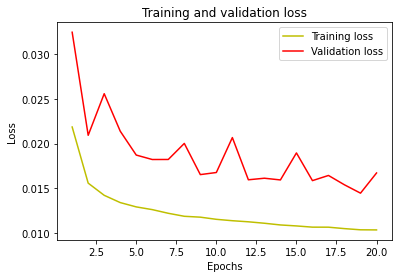

In [90]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

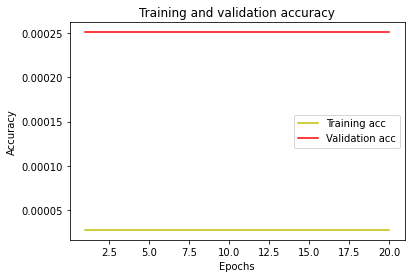

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
testPredict1 = model.predict(testX1)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testPredict1 = scaler.inverse_transform(testPredict1)
testY = scaler.inverse_transform([testY])




# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict1[:,0]))

Train Score: MAE 0.001307307711349352
Test Score: MAE 0.005570533561978466
Test Score: MAE 0.02575856173066941


In [94]:
"""# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(dataset),label='Training data')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend();
plt.show()"""

"# shift train predictions for plotting\ntrainPredictPlot = np.empty_like(dataset)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict\n\n# shift test predictions for plotting\ntestPredictPlot = np.empty_like(dataset)\ntestPredictPlot[:, :] = np.nan\ntestPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict\n\n# plot baseline and predictions\nplt.figure(figsize=(16, 4))\nplt.plot(scaler.inverse_transform(dataset),label='Training data')\nplt.plot(trainPredictPlot, label='Training Prediction')\nplt.plot(testPredictPlot, label='Test Prediction')\nplt.legend();\nplt.show()"

In [97]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredict.shape

(39899, 1)

In [120]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[20000:20000+13099, :] = testPredict


testPredictPlot1 = np.empty_like(dataset)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[20000:20000+13099, :] = testPredict1

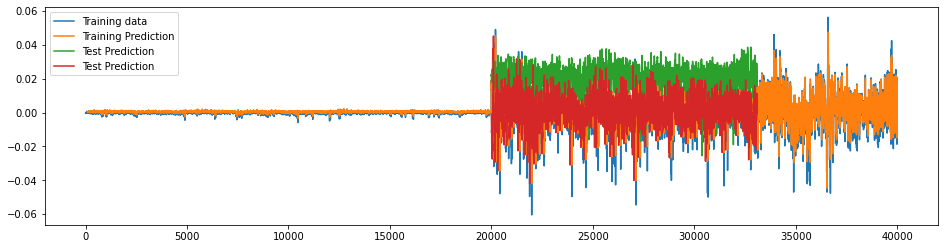

In [121]:

# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(dataset),label='Training data')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Good part of Test Prediction')
plt.plot(testPredictPlot1, label='Faulty part of Test Prediction')
plt.legend();
plt.show()

In [113]:
testPredict.mean() , trainPredict.mean()

(0.02229331, 0.0013374635)

In [117]:
score = model.evaluate(trainX,trainY)
score

ValueError: Data cardinality is ambiguous:
  x sizes: 39899
  y sizes: 1
Please provide data which shares the same first dimension.

In [115]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 0.00%
